In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. VERİ SETİNİ TANIMA VE YÜKLEME

In [2]:
df = pd.read_csv("cardio_train.csv", sep=';')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.shape

(70000, 13)

In [22]:
df.duplicated().sum()

np.int64(24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


2. VERİ ÖNİŞLEME (DATA PREPROCESSING)

In [8]:
# Eksik değer kontrolü
df.isnull().sum()


age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
# id sütunu model için anlamsız, siliyoruz
df.drop(columns=['id'], inplace=True)

In [9]:
# Yaşı günden yıla çeviriyoruz
df['age'] = df['age'] / 365


In [10]:
# Mantıksız tansiyon değerlerini filtrele
df = df[
    (df['ap_lo'] > 0) &
    (df['ap_hi'] > 0) &
    (df['ap_hi'] < 300) &
    (df['ap_lo'] < 200) &
    (df['ap_hi'] > df['ap_lo'])
]


In [11]:
# Mantıksız boy ve kilo değerlerini temizle
df = df[
    (df['height'] > 120) & (df['height'] < 220) &
    (df['weight'] > 30) & (df['weight'] < 200)
]


In [12]:
# BMI hesaplama
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

In [ ]:
# Mantıksız BMI değerlerini filtrele
df = df[(df['bmi'] > 10) & (df['bmi'] < 60)]

In [15]:
# Kategorik değişkenler
categorical_cols = [
    'gender',
    'cholesterol',
    'gluc',
    'smoke',
    'alco',
    'active'
]

categorical_cols


['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

Bu veri setinde kategorik değişkenler sayısal ve sıralı olduğundan ek bir encoding uygulanmamıştır.

In [16]:
# Hedef değişken
y = df['cardio']

# Özellikler
X = df.drop(columns=['cardio'])

In [17]:
X.shape, y.shape


((68595, 12), (68595,))

In [18]:
df.describe()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,68595.000000,68595.000000,68595.000000,68595.000000,68595.000000,68595.000000,68595.000000,68595.000000,68595.000000,68595.000000,68595.000000,68595.000000,68595.000000
mean,53.327667,1.348611,164.437495,74.084611,126.670836,81.274451,1.364808,1.225745,0.087951,0.053357,0.803426,0.494730,27.431705
std,6.760910,0.476534,7.848751,14.205139,16.705025,9.567709,0.679026,0.571573,0.283226,0.224745,0.397410,0.499976,5.167440
min,29.583562,1.000000,125.000000,31.000000,16.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.726644
25%,48.378082,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.975342,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.346494
75%,58.421918,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.116213
max,64.967123,2.000000,207.000000,183.000000,240.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,59.523810


In [19]:
df.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [23]:
# Temizlenmiş veriyi kaydet
df.to_csv("cardio_cleaned.csv", index=False)


In [25]:
# Temizlenmiş veri ile devam edilecek
df = pd.read_csv("cardio_cleaned.csv")


3. VERİ SETİNİ GÖRSELLEŞTİRME (EDA)

In [26]:
sns.set(style="whitegrid")

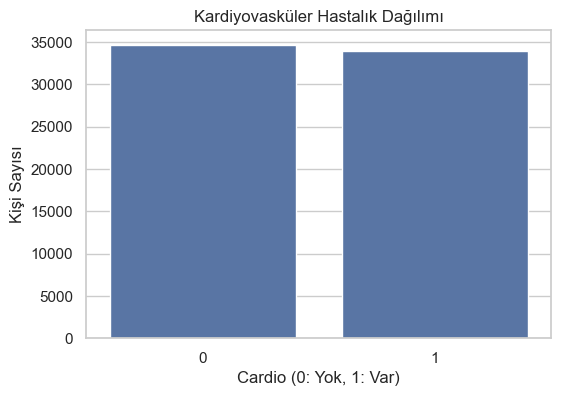

In [27]:
# Kardiyovasküler hastalık dağılımı
plt.figure(figsize=(6,4))
sns.countplot(x='cardio', data=df)
plt.title("Kardiyovasküler Hastalık Dağılımı")
plt.xlabel("Cardio (0: Yok, 1: Var)")
plt.ylabel("Kişi Sayısı")
plt.show()

Yorum: Veri setinde kardiyovasküler hastalığı olan ve olmayan bireylerin dağılımı incelendiğinde sınıfların dengeli olduğu görülmektedir. Bu durum sınıflandırma modelleri için avantaj sağlamaktadır.

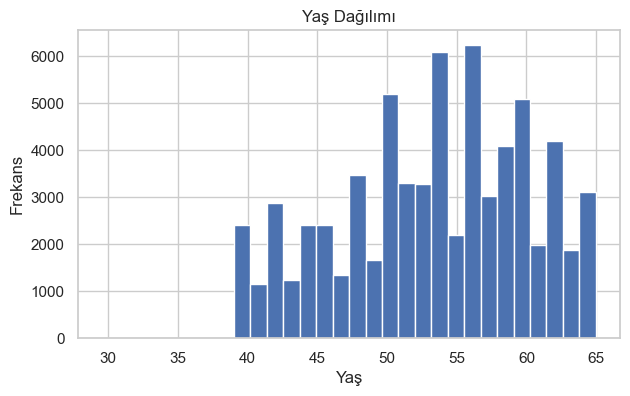

In [28]:
# Yaş dağılımı
plt.figure(figsize=(7,4))
plt.hist(df['age'], bins=30)
plt.title("Yaş Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Frekans")
plt.show()

Yorum:
Katılımcıların büyük çoğunluğunun orta ve ileri yaş grubunda yer aldığı görülmektedir.

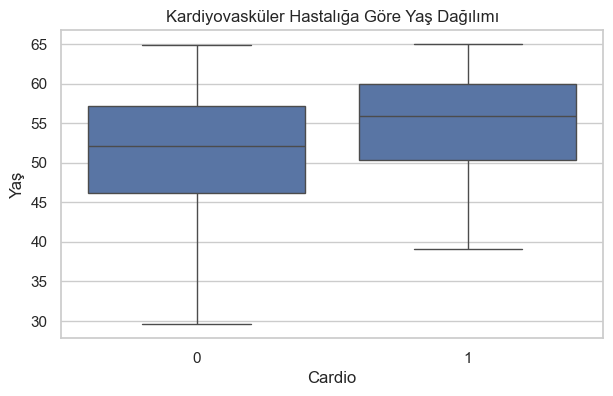

In [29]:
# Kardiyovasküler hastalığa göre yaş dağılımı
plt.figure(figsize=(7,4))
sns.boxplot(x='cardio', y='age', data=df)
plt.title("Kardiyovasküler Hastalığa Göre Yaş Dağılımı")
plt.xlabel("Cardio")
plt.ylabel("Yaş")
plt.show()

Yorum: Kardiyovasküler hastalığı olan bireylerin yaş ortalamasının, olmayan bireylere kıyasla daha yüksek olduğu gözlemlenmektedir.

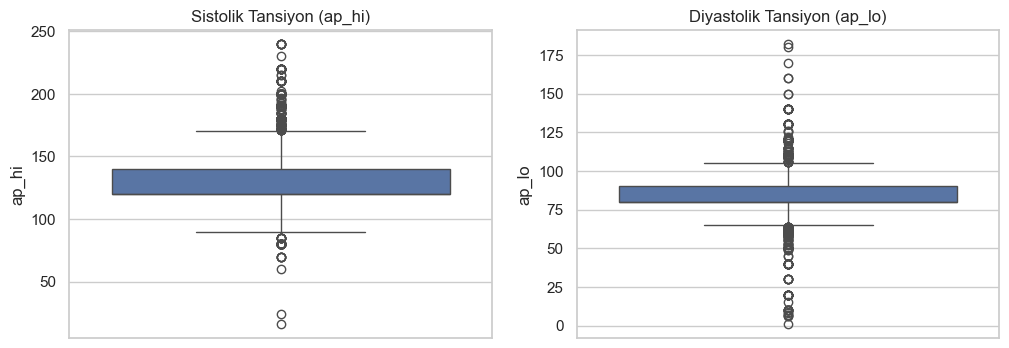

In [30]:
# Tansiyon değerlerinin kutu grafiği
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.boxplot(y=df['ap_hi'])
plt.title("Sistolik Tansiyon (ap_hi)")

plt.subplot(1,2,2)
sns.boxplot(y=df['ap_lo'])
plt.title("Diyastolik Tansiyon (ap_lo)")

plt.show()

Yorum: Sistolik ve diyastolik tansiyon değerlerinin dağılımı incelendiğinde, kardiyovasküler hastalıkla ilişkili olabilecek yüksek değerlerin mevcut olduğu görülmektedir.

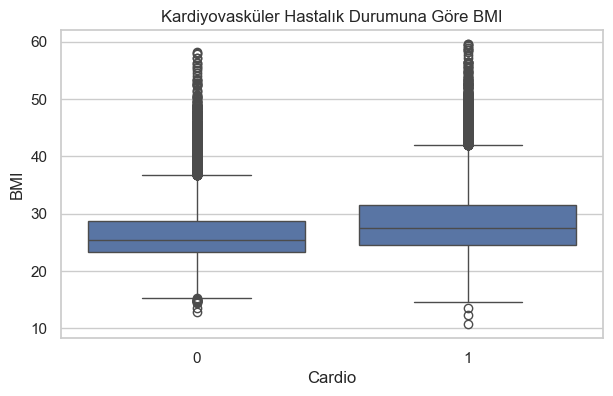

In [31]:
# Kardiyovasküler Hastalık Durumuna Göre BMI
plt.figure(figsize=(7,4))
sns.boxplot(x='cardio', y='bmi', data=df)
plt.title("Kardiyovasküler Hastalık Durumuna Göre BMI")
plt.xlabel("Cardio")
plt.ylabel("BMI")
plt.show()

Yorum: Kardiyovasküler hastalığı olan bireylerde BMI değerlerinin daha yüksek olduğu gözlemlenmiştir.

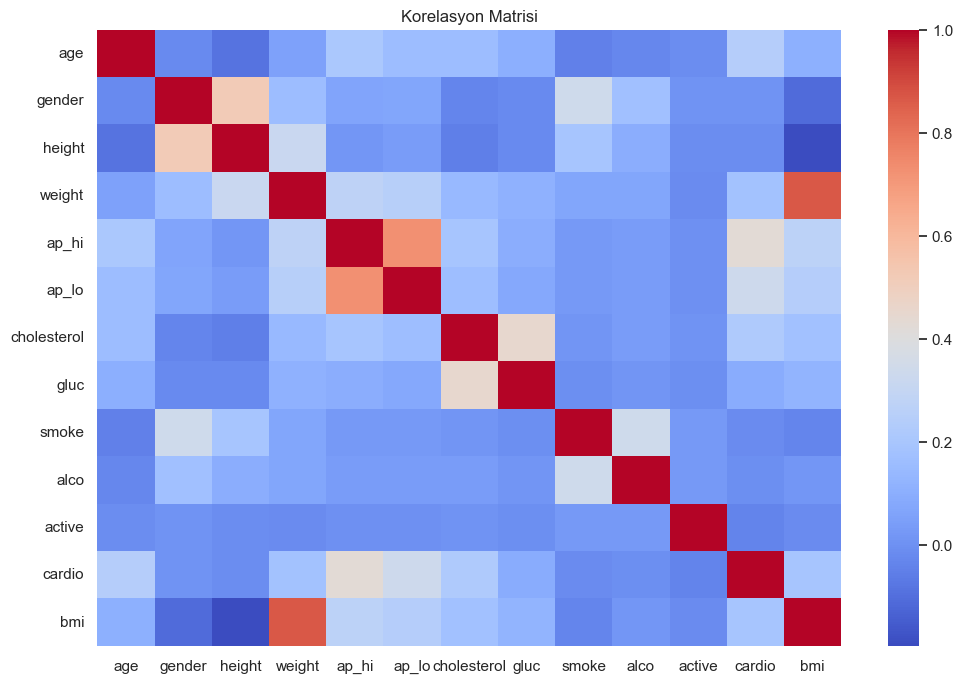

In [32]:
# Korelasyon matrisi"
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()


Yorum: Yaş, tansiyon ve BMI değişkenlerinin hedef değişkenle pozitif korelasyon gösterdiği gözlemlenmiştir.

4. İSTATİSTİKSEL ANALİZ

In [ ]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,68595.000000,68595.000000,68595.000000,68595.000000,68595.000000,68595.000000,68595.000000,68595.000000,68595.000000,68595.000000,68595.000000,68595.000000,68595.000000
mean,53.327667,1.348611,164.437495,74.084611,126.670836,81.274451,1.364808,1.225745,0.087951,0.053357,0.803426,0.494730,27.431705
std,6.760910,0.476534,7.848751,14.205139,16.705025,9.567709,0.679026,0.571573,0.283226,0.224745,0.397410,0.499976,5.167440
min,29.583562,1.000000,125.000000,31.000000,16.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.726644
25%,48.378082,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.975342,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.346494
75%,58.421918,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.116213
max,64.967123,2.000000,207.000000,183.000000,240.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,59.523810


In [35]:
# Kardiyovasküler hastalığa göre yaş, tansiyon ve BMI ortalamaları
df.groupby('cardio')[['age', 'ap_hi', 'ap_lo', 'bmi']].mean()


,age,ap_hi,ap_lo,bmi
cardio,,,,
0,51.725874,119.602470,78.093569,26.446362
1,54.963586,133.889793,84.523102,28.438041


Yorum:
Kardiyovasküler hastalığı olan bireylerde yaş, tansiyon ve BMI ortalamalarının daha yüksek olduğu görülmektedir.

In [36]:
# Kardiyovasküler hastalık ile diğer değişkenler arasındaki korelasyon
df.corr()['cardio'].sort_values(ascending=False)

cardio         1.000000
ap_hi          0.427615
ap_lo          0.335986
age            0.239432
cholesterol    0.221531
bmi            0.192705
weight         0.181270
gluc           0.089383
gender         0.007252
alco          -0.008396
height        -0.012055
smoke         -0.016236
active        -0.037497
Name: cardio, dtype: float64

Yorum: Korelasyon analizi sonucunda kardiyovasküler hastalık ile en yüksek ilişkiye sahip değişkenlerin sistolik tansiyon (ap_hi), diyastolik tansiyon (ap_lo) ve yaş olduğu görülmüştür. BMI ve kolesterol değişkenleri ise orta düzeyde pozitif korelasyon göstermektedir.

In [37]:
# İki grup arasındaki yaş farkının anlamlı olup olmadığını test etme
# t-test
from scipy.stats import ttest_ind

group0 = df[df['cardio'] == 0]['age']
group1 = df[df['cardio'] == 1]['age']

t_stat, p_value = ttest_ind(group0, group1)

t_stat, p_value

(np.float64(-64.58648493041534), np.float64(0.0))

Yorum: Kardiyovasküler hastalığı olan ve olmayan bireylerin yaş ortalamaları arasında yapılan bağımsız örneklem t-testi sonucunda istatistiksel olarak anlamlı bir fark bulunmuştur (t = -64.59, p < 0.001). Kardiyovasküler hastalığı olan bireylerin yaş ortalamasının daha yüksek olduğu görülmüştür.

In [38]:
# İki grup arasındaki yaş farkının anlamlı olup olmadığını test etme
# Mann-Whitney U testi
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(group0, group1)

u_stat, p_value

(np.float64(427872389.0), np.float64(0.0))

Yorum: Yapılan Mann–Whitney U testi sonucunda kardiyovasküler hastalığı olan ve olmayan bireylerin yaş dağılımları arasında istatistiksel olarak anlamlı bir fark bulunmuştur (p < 0.05).

5. MODELLEME (Sınıflandırma)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# X ve y (daha önce ayırmıştık)
X = df.drop(columns=['cardio'])
y = df['cardio']

# Train - Test ayırma
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [40]:
# Özellik ölçekleme
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MODEL 1 — Logistic Regression

Neden bu model?

Basit

Yorumlanabilir

Sağlık verilerinde çok yaygın

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)


In [42]:
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_lr


0.7325606822654712

MODEL 2 — K-Nearest Neighbors (KNN)

Neden bu model?

Mesafeye dayalı

Veri yapısını iyi yakalar

Ölçekleme zorunlu

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)


In [44]:
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_knn


0.6994678912457176

MODEL 3 — Decision Tree

Neden bu model?

Yorumlanabilir

Non-lineer ilişkileri yakalar

Ölçekleme gerektirmez

In [45]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


In [46]:
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_dt


0.6350317078504264

MODEL 4 — Random Forest

Neden bu model?

Decision Tree’lerin topluluğu

Overfitting daha az

Genelde en güçlü modellerden biri

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [50]:
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_rf



0.7163787448064728

MODEL 5 — Support Vector Machine (SVM)

Neden bu model?

Yüksek boyutlu veride güçlü

Sağlık verilerinde sık kullanılır

Ölçekleme zorunlu

In [51]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)


In [52]:
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_svm

0.7391938187914571

MODEL 6 — Naive Bayes 

Neden Naive Bayes?

Olasılıksal (probabilistic) yaklaşım

Çok hızlı

Sağlık ve biyomedikal verilerde klasik

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

y_pred_nb = nb.predict(X_test_scaled)

In [54]:
acc_nb = accuracy_score(y_test, y_pred_nb)
acc_nb

0.7129528391282164

MODEL 7 — Gradient Boosting Classifier

Neden Gradient Boosting?

Boosting yaklaşımı (ardışık öğrenme)

Random Forest’tan farklı olarak:

Hatalara odaklanır

Genelde en yüksek performanslı modellerden biri

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)


In [56]:
acc_gb = accuracy_score(y_test, y_pred_gb)
acc_gb


0.738319119469349

6. MODEL KARŞILAŞTIRMA VE DEĞERLENDİRME

In [57]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)


In [58]:
# Model değerlendirme fonksiyonu
def evaluate_model(y_test, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }


In [59]:
# Tüm modelleri değerlendir
results = []

results.append(evaluate_model(y_test, y_pred_lr, "Logistic Regression"))
results.append(evaluate_model(y_test, y_pred_knn, "KNN"))
results.append(evaluate_model(y_test, y_pred_dt, "Decision Tree"))
results.append(evaluate_model(y_test, y_pred_rf, "Random Forest"))
results.append(evaluate_model(y_test, y_pred_svm, "SVM"))
results.append(evaluate_model(y_test, y_pred_nb, "Naive Bayes"))
results.append(evaluate_model(y_test, y_pred_gb, "Gradient Boosting"))


In [63]:
# Sonuçları DataFrame olarak göster
results_df = pd.DataFrame(results)
results_df.set_index("Model").round(4)

,Accuracy,Precision,Recall,F1-Score
Model,,,,
Logistic Regression,0.7326,0.7579,0.6751,0.7141
KNN,0.6995,0.7029,0.6798,0.6912
Decision Tree,0.6350,0.6299,0.6358,0.6328
Random Forest,0.7164,0.7180,0.7027,0.7103
SVM,0.7392,0.7660,0.6809,0.7209
Naive Bayes,0.7130,0.7581,0.6165,0.6800
Gradient Boosting,0.7383,0.7526,0.7016,0.7262


In [64]:
# En iyi modeli accuracy'e göre sırala
results_df.sort_values(by="Accuracy", ascending=False).round(4)

,Model,Accuracy,Precision,Recall,F1-Score
4,SVM,0.7392,0.7660,0.6809,0.7209
6,Gradient Boosting,0.7383,0.7526,0.7016,0.7262
0,Logistic Regression,0.7326,0.7579,0.6751,0.7141
3,Random Forest,0.7164,0.7180,0.7027,0.7103
5,Naive Bayes,0.7130,0.7581,0.6165,0.6800
1,KNN,0.6995,0.7029,0.6798,0.6912
2,Decision Tree,0.6350,0.6299,0.6358,0.6328


Yorum: Accuracy açısından en iyi sonuç SVM modeli tarafından elde edilirken, F1-score ve recall metrikleri göz önüne alındığında Gradient Boosting modeli daha dengeli bir performans sergilemiştir.

7. SONUÇLARIN TABLO VE GÖRSELLERLE ANALİZİ

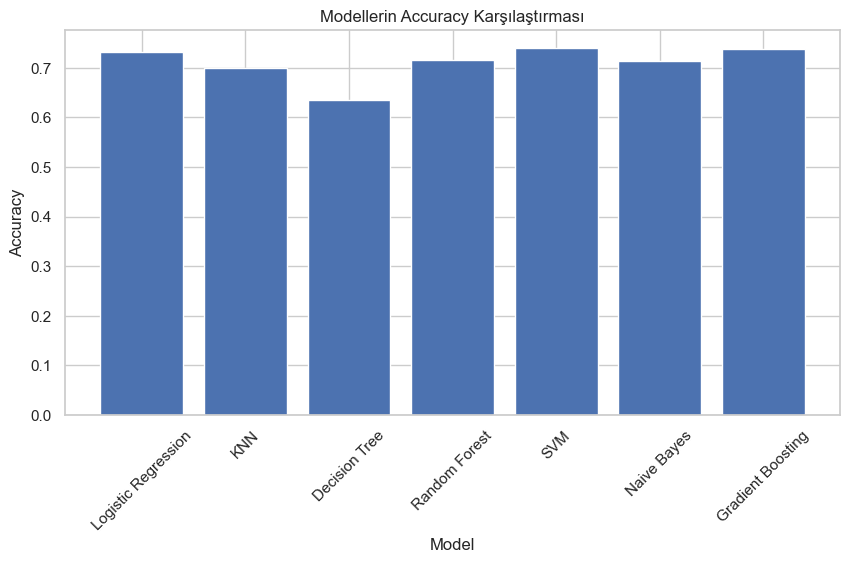

In [65]:
# Accuracy'e göre görselleştir
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(results_df["Model"], results_df["Accuracy"])
plt.xticks(rotation=45)
plt.title("Modellerin Accuracy Karşılaştırması")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()

Yorum:
Modellerin doğruluk oranları karşılaştırıldığında SVM ve Gradient Boosting modellerinin öne çıktığı görülmektedir.

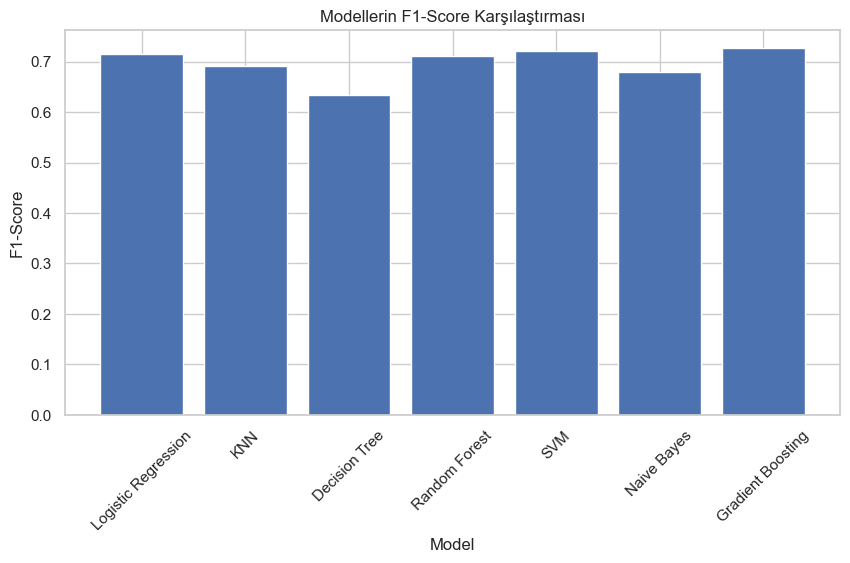

In [66]:
# F1-Score'a göre görselleştir
plt.figure(figsize=(10,5))
plt.bar(results_df["Model"], results_df["F1-Score"])
plt.xticks(rotation=45)
plt.title("Modellerin F1-Score Karşılaştırması")
plt.ylabel("F1-Score")
plt.xlabel("Model")
plt.show()

Yorum: F1-score metriği, precision ve recall arasındaki dengeyi göstermesi nedeniyle sağlık alanındaki sınıflandırma problemleri için kritik bir ölçüttür.


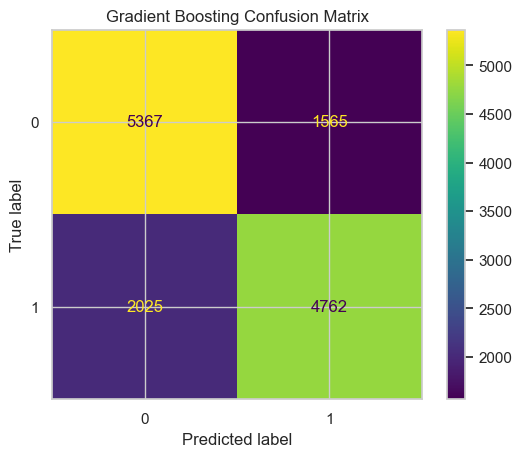

In [67]:
# En İyi Model İçin Confusion Matrix (Gradient Boosting)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_gb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

Yorum:
Confusion matrix incelendiğinde, modelin kardiyovasküler hastalığı olan bireyleri doğru sınıflandırma oranının yüksek olduğu görülmektedir.

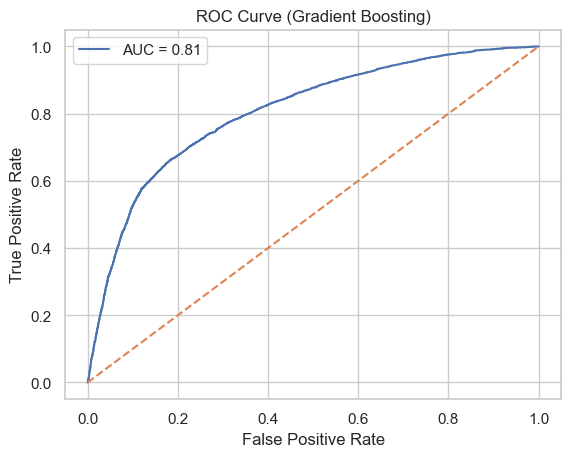

In [68]:
# ROC Eğrisi ve AUC (Gradient Boosting)
from sklearn.metrics import roc_curve, auc

y_proba = gb.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Gradient Boosting)")
plt.legend()
plt.show()

Yorum:
ROC eğrisi altında kalan alan (AUC), modelin sınıfları ayırt etme başarısını göstermektedir.